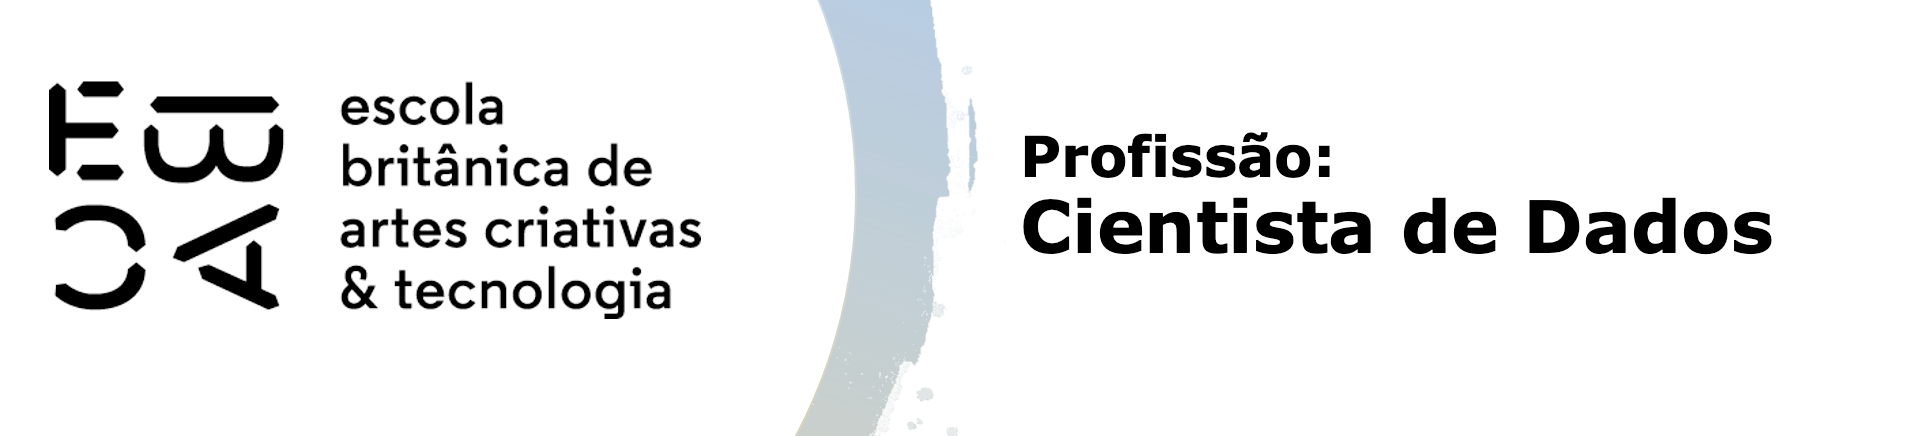

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [24]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from ydata_profiling import ProfileReport
from tqdm import tqdm
from IPython.display import display

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")

In [3]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

Não há missing values.

In [6]:
prof = ProfileReport(df, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 78.37it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Não há missing values entre os dados estudados. Entretanto, há uma grande quantidade de dados numéricos iguais a 0, variando entre, aproximadamente 9% dos dados da variável ProductRelated_Duration à, aproximadamente, 90% dos dados de SpecialDay. A distribuição dos dados observados segue uma padronização entre os valores não nulos, estando distribuidos de forma semelhantes e/ou havendo uma distribuição muito semelhante a uma regressão linear.<br>
Percebemos uma grande variabilidade dos valores de tempo de duração de visitas no site, considerando a descrição das variáveis entende-se que essa diferença entre valores é comum e não é nescessário uma padronização deles.<br>
Entretanto o valor de tipo de visitantes (novos visitantes, visitantes recorrentes ou outros ) tem poucas repostas como "others" (85) , então, podemos considerar esse valor como irrelevante, e os exluirei, uma vez que essa resposta não parece ter significado de importância. Assim reduzirei as possibilidades de respostas para essa pergunta e transformarei em boolean, também trocando o nome da coluna para New_Visitor <br>
Também temos a coluna de meses que pode ser transformada, com um dicionário em inteiros, de  uma forma que seja de fácil entendimento para o leitor.

In [7]:
df[["VisitorType", "Revenue"]].value_counts()

VisitorType        Revenue
Returning_Visitor  False      9081
                   True       1470
New_Visitor        False      1272
                   True        422
Other              False        69
                   True         16
Name: count, dtype: int64

In [8]:
df = df.drop(df[df["VisitorType"] == "Other"].index)
df[["VisitorType"]].value_counts()

VisitorType      
Returning_Visitor    10551
New_Visitor           1694
Name: count, dtype: int64

In [9]:
df["VisitorType"] = (df["VisitorType"] == "New_Visitor")
df.rename(columns={"VisitorType": "New_Visitor"}, inplace=True)

In [10]:
mapa_meses = {
    "Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4,
    "May": 5, "June": 6, "Jul": 7, "Aug": 8,
    "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12
}

df["Month"] = df["Month"].map(mapa_meses)

In [11]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0      2                 1   
1         0.00       0.10         0.0         0.0      2                 2   
2         0.20       0.20         0.0         0.0      2                 4   
3         0.05       0.14         0.0         0.0      2                 3   
4         0.02       0.05         0.0         0.0      2                 3   

   Browser  Region  TrafficType  New_Visitor  Weekend  Revenue  
0        1       1            1        False    False    False  
1        2       1            2        False    False    False  
2        1       9            3        False    False    False  
3        2       2            4        False    False    False  
4        3       1            4        False     True    False

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12245 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12245 non-null  int64  
 1   Administrative_Duration  12245 non-null  float64
 2   Informational            12245 non-null  int64  
 3   Informational_Duration   12245 non-null  float64
 4   ProductRelated           12245 non-null  int64  
 5   ProductRelated_Duration  12245 non-null  float64
 6   BounceRates              12245 non-null  float64
 7   ExitRates                12245 non-null  float64
 8   PageValues               12245 non-null  float64
 9   SpecialDay               12245 non-null  float64
 10  Month                    12245 non-null  int64  
 11  OperatingSystems         12245 non-null  int64  
 12  Browser                  12245 non-null  int64  
 13  Region                   12245 non-null  int64  
 14  TrafficType              12

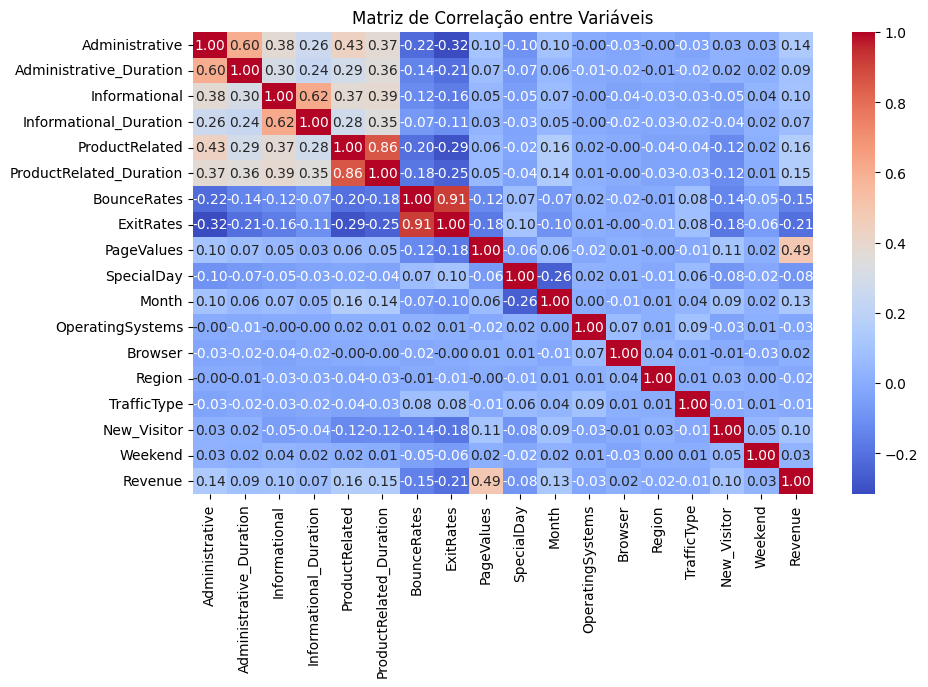

In [13]:
# Criação de heatmap para análise de relação entre variáveis
# a função corr() ignora osvalores nulos

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação entre Variáveis")
plt.show()

Considerando o desenho da matrizde correlação encontrada percebemos uma esperada e clara forte relação entre as variáveis já esperadas, sendo a relação entre "BounceRates" x "ExitRates" o de melhor correlação (0,91), seguindo do "ProductRelated" x "ProductRelated_Duration" (0,86), "Informational" x "Informational_Duration" (0,62) e "Administrative" x "Administrative_Duration" (0,6).<br>
Além desses percebemos uma boa relação entre "PageValues" x "Revenue" (0,49), sendo essa uma relação muito interessante, entre a média de páginas visitadas para um visitante fechar a compra.<br>
O "Administrative" x "ProductRelated" tem relação de 0,43, mostrando uma relação relativamente importante entre os visitantes de páginas administrativas e de páginas de produtos.

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

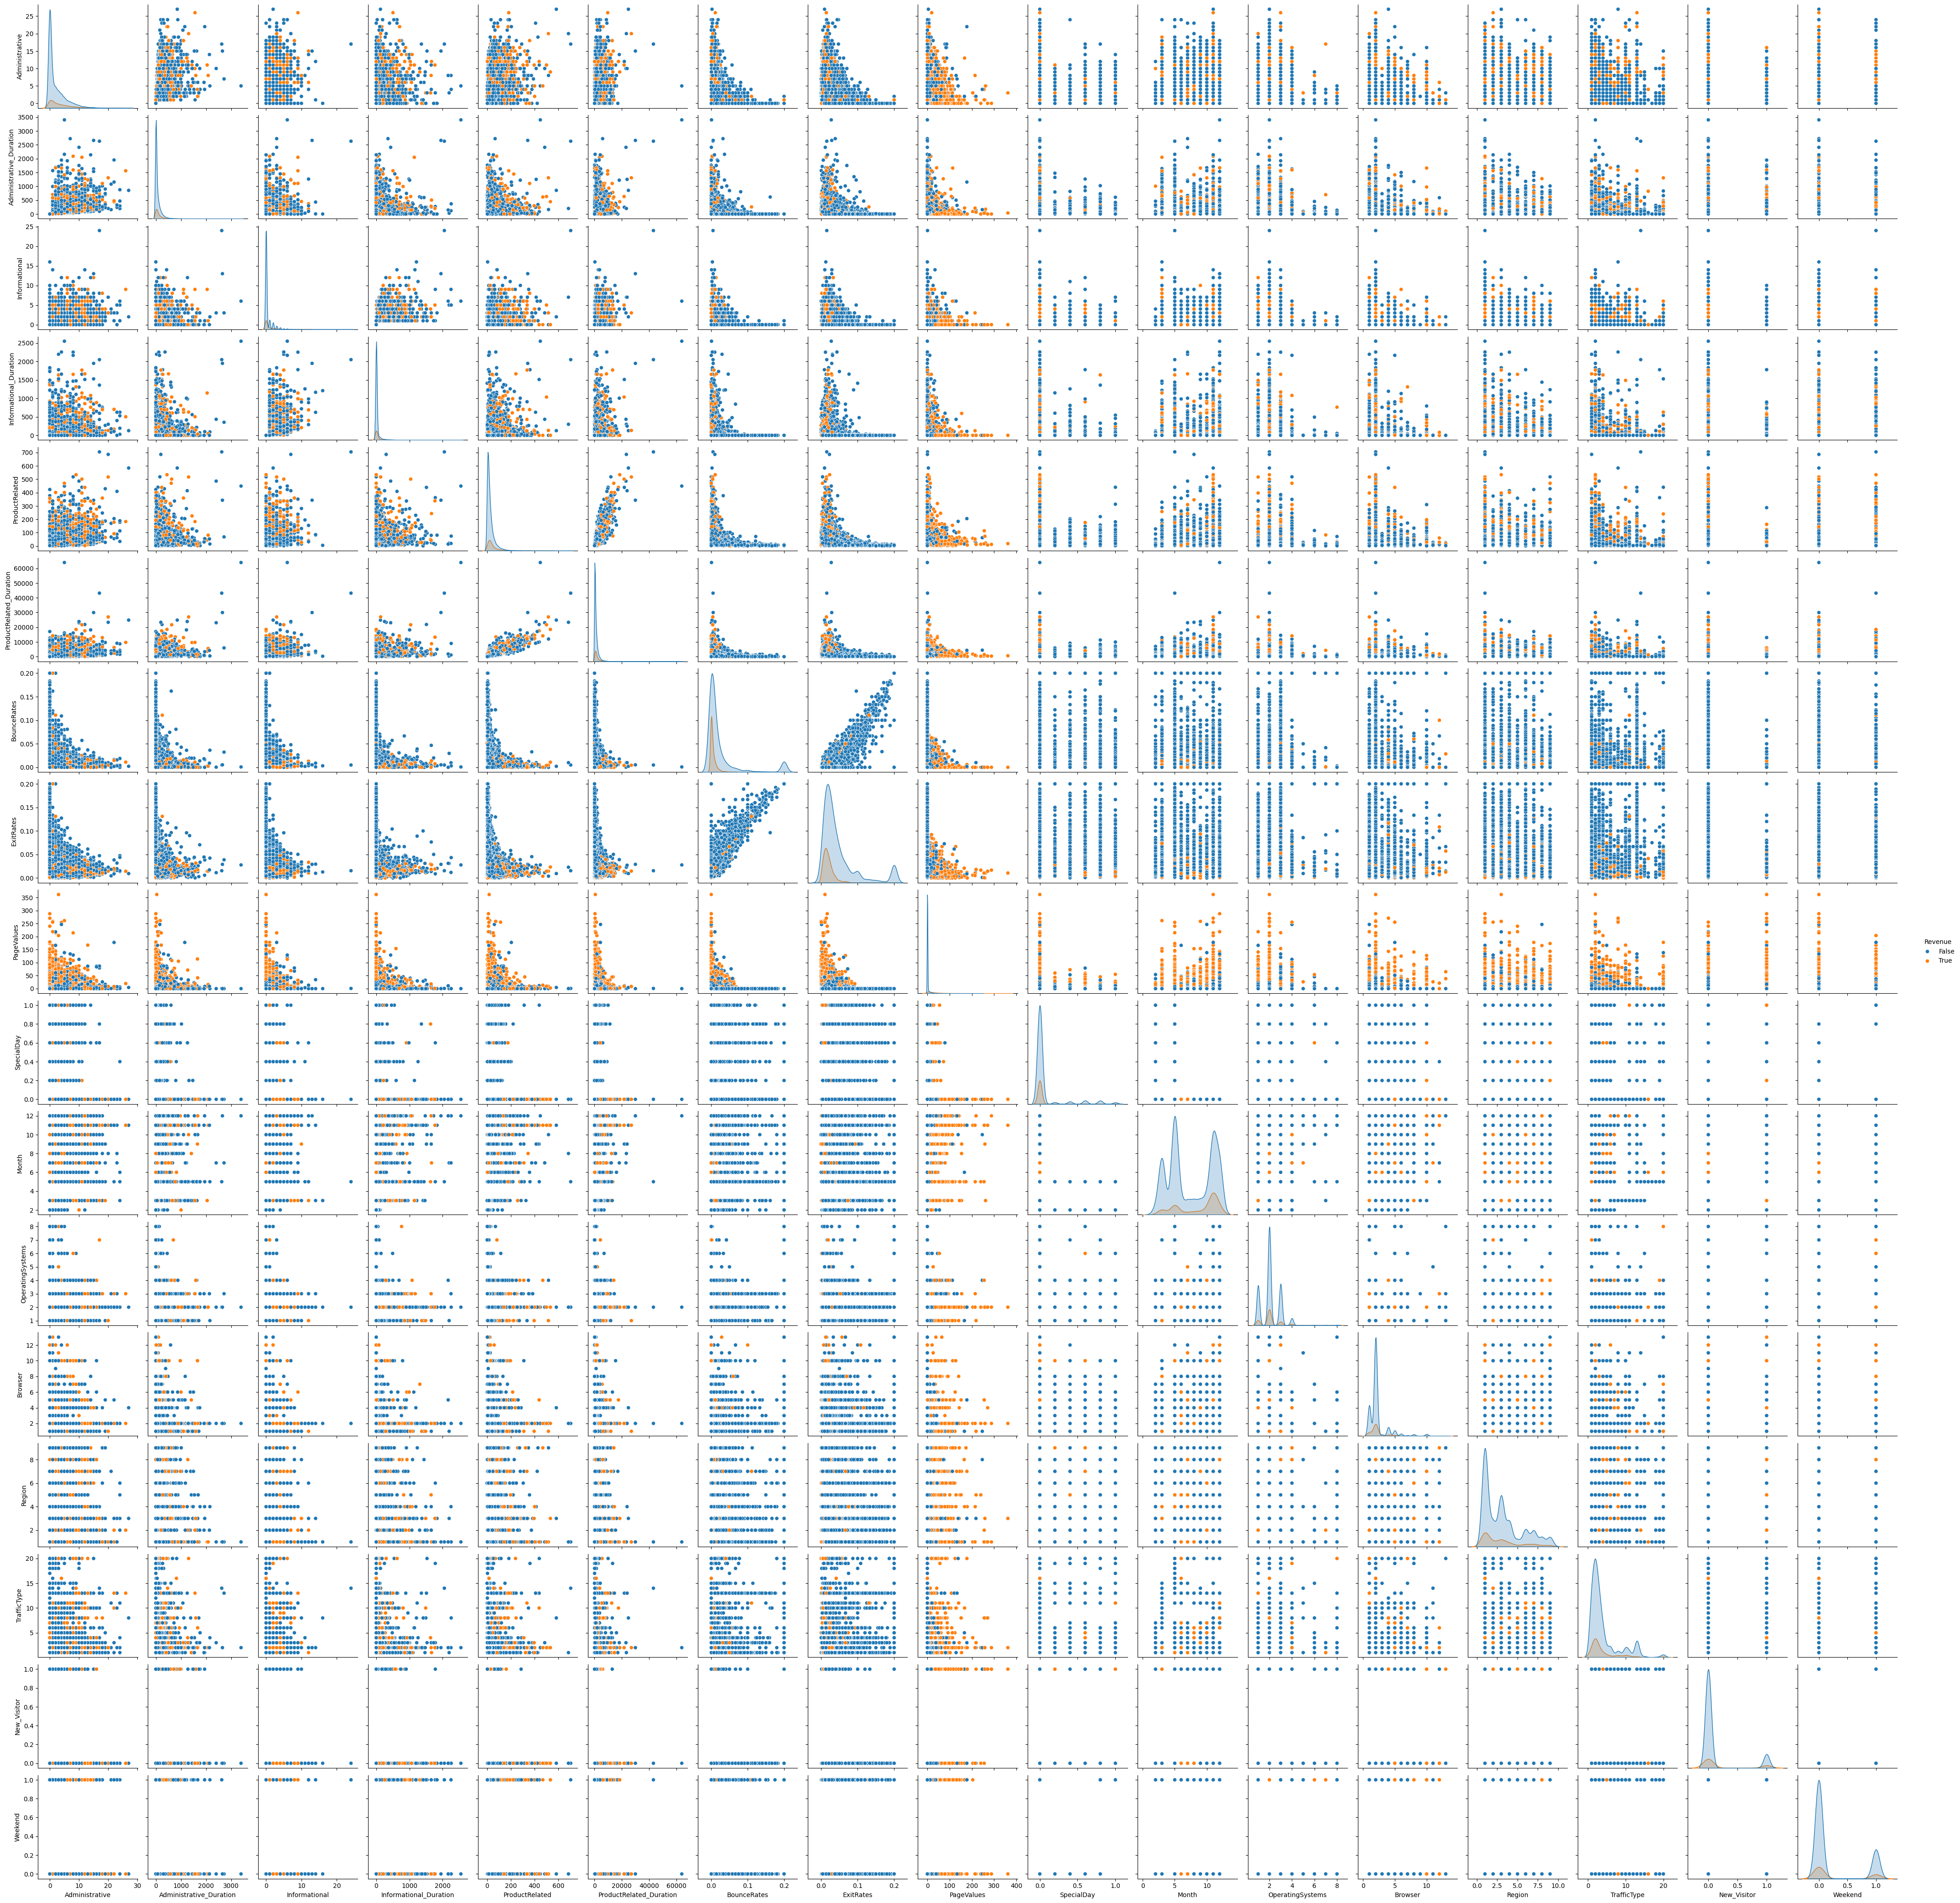

In [14]:
sns.pairplot(df, hue="Revenue")

Notamos duas classificações nesses dados, que muitas vezes se confundem com apenas uma.

In [15]:
# O resultado pretendido é a compra ou não do produto oferecido
# Separar X e y
X = df[["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated", "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues", "SpecialDay",
        "Month", "OperatingSystems", "Browser", "Region", "TrafficType", "New_Visitor","Weekend"]]
y = df[["Revenue"]]

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:19<00:00,  1.03s/it]


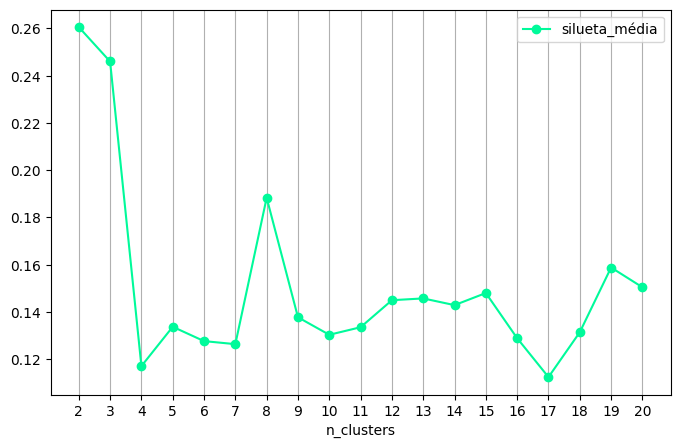

In [16]:
# Criar o gráfico de silhueta

y_cat = pd.Categorical.from_codes(codes=(y-1).values.flatten(), categories =["Revenue"])
y_cat.value_counts()

X_pad = pd.DataFrame(StandardScaler().fit_transform(X), columns = X.columns)
X_pad["y"] = y_cat

variaveis = X_pad.columns.drop("y")

# Inicializar uma lista vazia que vai conter os valores da silueta média
siluetas = []
# Este é o número máximo de grupos que vamos testar
max_clusters = 20

# O loop percorre de 2 até o máximo de clusters
for n_clusters in tqdm(range(2, max_clusters+1)):
    # k-means
    km = KMeans(n_clusters=n_clusters).fit(X_pad[variaveis])
    # Aqui calculamos a silueta e guardamos o resultado na lista "siluetas"
    siluetas.append(silhouette_score(X_pad[variaveis], km.labels_))
    # Essa lista define o nome dos grupos
    nomes_grupos = ["grupo_" + str(g) for g in range(n_clusters)]
    # Agora vamos adicionar uma coluna no dataframe X_pad com o agrupamento construido
    X_pad["grupos_"+str(n_clusters)] = pd.Categorical.from_codes(km.labels_, categories = nomes_grupos)


df_silueta = pd.DataFrame({"n_clusters": list(range(2, max_clusters+1)), "silueta_média": siluetas})

df_silueta.plot.line(x = "n_clusters", y = "silueta_média", marker="o", color="#00fa9a", figsize=(8,5))
plt.xticks(list(range(2, max_clusters+1)))
plt.grid(axis = "x")
plt.show()

Melhores valores de clusteres: 2 > 3 > 8 

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [22]:
def kmeans(n):
    if n == 1:
        alg = "lloyd"
    else:
        alg = "elkan"
        
    kmeans = KMeans(n_clusters=n, max_iter=600, algorithm=alg)
    kmeans.fit(df)
    col = f"cluster_{n}"  
    df_copy = df.copy()  
    df_copy[col] = kmeans.labels_

    print(f"Análise Descritiva para {n} Clusters:")
    display(df_copy.groupby(col).mean())  
    display(df_copy[col].value_counts())
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(df_copy.drop(col, axis=1))
    pca1 = f"pca1_{n}"
    pca2 = f"pca2_{n}"
    
    df_copy[pca1] = X_pca[:, 0]
    df_copy[pca2] = X_pca[:, 1]
        
    fig, ax = plt.subplots(figsize=(10, 8))
    scatter = ax.scatter(df_copy[pca1], df_copy[pca2], c=df_copy[col], cmap="viridis", alpha=0.6)

    # Criar legenda dos clusters
    handles = []
    cmap = plt.cm.get_cmap("viridis")
    norm = plt.Normalize(vmin=0, vmax=n-1)
    for cluster_num in range(n):
        color = cmap(norm(cluster_num))
        handles.append(mpatches.Patch(color=color, label=f"Cluster {cluster_num}"))
    ax.legend(handles=handles, title="Clusters", loc="best")

    # Criar setas (variáveis projetadas nos componentes principais)
    coeff = pca.components_.T  # Corrigir a orientação
    scaling_factor = np.max(np.abs(X_pca)) * 0.1  # Escala para visualização

    for i in range(coeff.shape[0]):
        ax.arrow(0, 0, coeff[i,0]*scaling_factor, coeff[i,1]*scaling_factor,
                 color='r', alpha=0.7, head_width=0.2, head_length=0.2)
        ax.text(coeff[i,0]*scaling_factor*1.2, coeff[i,1]*scaling_factor*1.2,
                df.columns[i], color='k', ha='center', va='center', fontsize=8)

    ax.grid(True)
    plt.title(f'Clusters ({n}) - PCA Projection', fontsize=14)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

    if n == 1:
        return
    else:
        return df_copy, col

Análise Descritiva para 1 Clusters:


Administrative  Administrative_Duration  Informational  \
cluster_1                                                           
0                2.321029                80.944413       0.505839   

           Informational_Duration  ProductRelated  ProductRelated_Duration  \
cluster_1                                                                    
0                       34.630576       31.865169              1199.080153   

           BounceRates  ExitRates  PageValues  SpecialDay     Month  \
cluster_1                                                             
0             0.022078   0.042932    5.803858    0.061854  7.624091   

           OperatingSystems   Browser    Region  TrafficType  New_Visitor  \
cluster_1                                                                   
0                  2.098326  2.311719  3.121437     4.002858     0.138342   

            Weekend   Revenue  
cluster_1                      
0          0.233646  0.154512

cluster_1
0    12245
Name: count, dtype: int64

C:\Users\marin\AppData\Local\Temp\ipykernel_27072\2903895303.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("viridis")


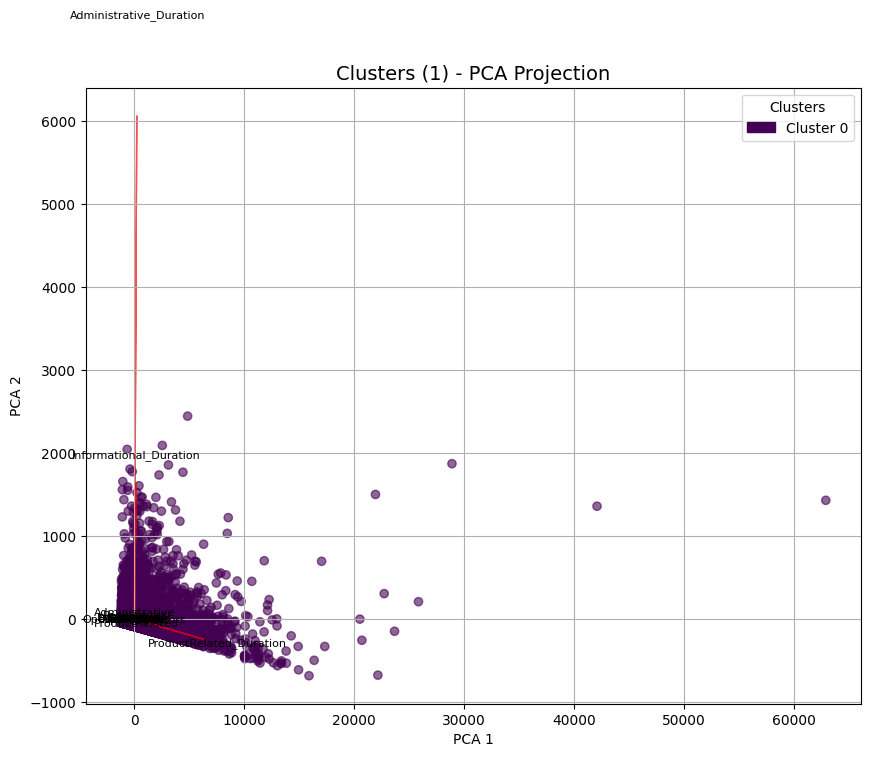

In [25]:
kmeans(1)

Observando esse gráfico, plotado apenas para entendimento do desenho, podemos, visualmente separar os dados estudados em 3 grupos, o primeiro até, aproximadamente X = 0, em que há muitos pontos "altos" na curva. O segundo até aproximadamente X = 8500, em que notamos, quase uma linearidade decrescente nos dados extremos, com y máximo, salvo alguns "outsiders". E por último valores em que X é maior que 8500, em que os dados se apresentam mais espaços. <br>
Considerando os dados obtidos anteriormente, faremos o estudo com 2, 3 e 8 clusters. 

Análise Descritiva para 2 Clusters:


Administrative  Administrative_Duration  Informational  \
cluster_2                                                           
0                2.048608                70.506572       0.403005   
1                5.635484               207.938147       1.756989   

           Informational_Duration  ProductRelated  ProductRelated_Duration  \
cluster_2                                                                    
0                       25.432622       23.341759               796.772237   
1                      146.539010      135.566667              6093.826466   

           BounceRates  ExitRates  PageValues  SpecialDay     Month  \
cluster_2                                                             
0             0.023359   0.044754    5.680356    0.063155  7.502784   
1             0.006488   0.020760    7.306475    0.046022  9.100000   

           OperatingSystems   Browser    Region  TrafficType  New_Visitor  \
cluster_2                                                                   
0                  2.095449  2.309236  3.141228     4.038091      0.14821   
1                  2.133333  2.341935  2.880645     3.574194      0.01828   

            Weekend   Revenue  
cluster_2                      
0          0.233584  0.142377  
1          0.234409  0.302151

cluster_2
0    11315
1      930
Name: count, dtype: int64

C:\Users\marin\AppData\Local\Temp\ipykernel_27072\2903895303.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("viridis")


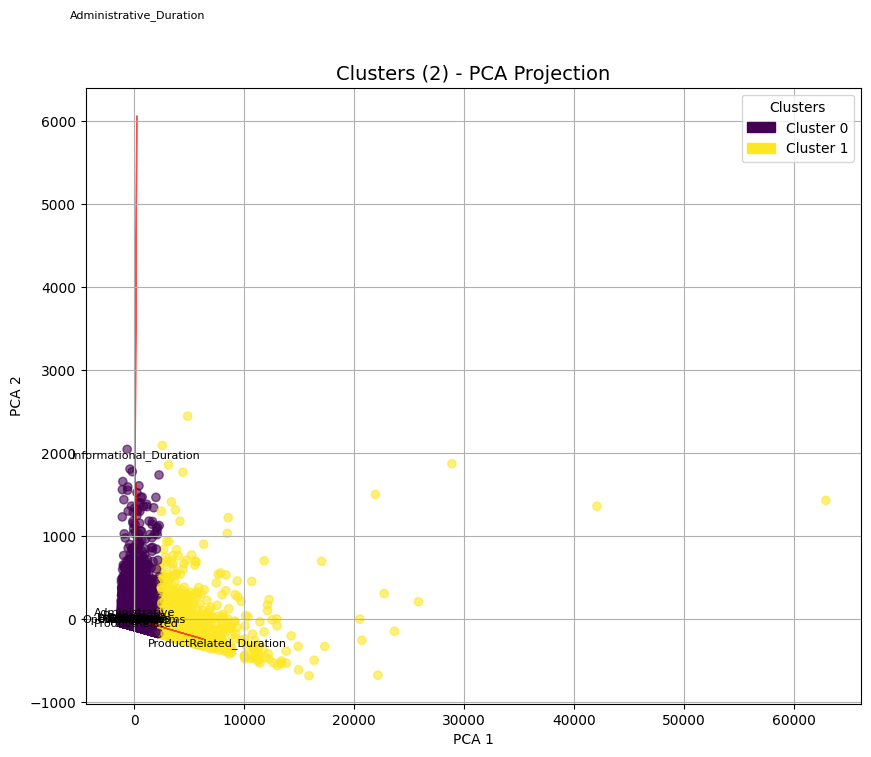

In [26]:
df_2, col_2 = kmeans(2)

O resultado obtido com 2 clusters apresenta uma grande desigualdade na quantidade de valores divididos entre os grupos (11315 x 930), tornando a interpretação visual dos dados pouco clara, havendo uma sobreposição dos agrupamentos. Entretanto, há uma clara diferença entre os valores médios encontrados para ambos os clusteres, destacando-se os valores de Administrative_Duration, Informational,	Informational_Duration, ProductRelated e ProductRelated_Duration. Em relação aos valores de New_Visitor e Revenue, inicialmente classificados como booleans, apesar de haver uma grande distinção entre seus valores, eles continuam são persistentementes próximos de 0, ou seja podemos considerá-los como "False".<br>
Cluster 0: Maior Quantidade de New_Visitors e Menor Revenue<br>
Cluster 1: Altos Valores de Duração e Maior Revenue

Análise Descritiva para 3 Clusters:


Administrative  Administrative_Duration  Informational  \
cluster_3                                                           
0                1.822209                62.035264       0.328764   
1                7.475728               296.798701       2.742718   
2                4.330289               154.973500       1.176560   

           Informational_Duration  ProductRelated  ProductRelated_Duration  \
cluster_3                                                                    
0                       20.047384       18.688717               578.670124   
1                      266.921912      236.174757             10892.271282   
2                       84.844457       77.817859              3355.087662   

           BounceRates  ExitRates  PageValues  SpecialDay     Month  \
cluster_3                                                             
0             0.025337   0.047571    5.404909    0.064640  7.407032   
1             0.005710   0.019463    4.543319    0.031068  9.461165   
2             0.007143   0.021691    7.973463    0.050837  8.540842   

           OperatingSystems   Browser    Region  TrafficType  New_Visitor  \
cluster_3                                                                   
0                  2.092173  2.316448  3.140743     4.072904     0.158721   
1                  2.121359  2.257282  2.553398     3.611650     0.004854   
2                  2.127347  2.293252  3.082192     3.685946     0.048199   

            Weekend   Revenue  
cluster_3                      
0          0.235995  0.132002  
1          0.252427  0.339806  
2          0.219685  0.250127

cluster_3
0    10068
2     1971
1      206
Name: count, dtype: int64

C:\Users\marin\AppData\Local\Temp\ipykernel_27072\2903895303.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("viridis")


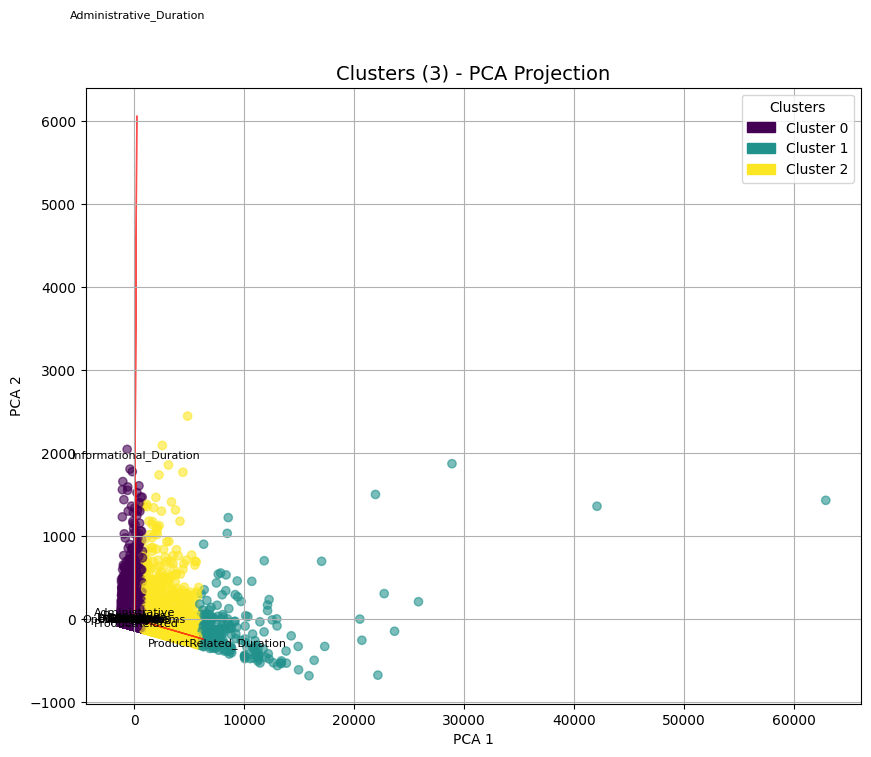

In [27]:
df_3, col_3 = kmeans(3)

O gráfico para 3 clusteres apresenta umamelhor divisão visual, apesar de ainda haver sobreposição dos grupos, quando comparado ao de 2 clusters. Entretanto, há uma maior diferença na separação dos dados, anteriormente sendo de 11315 para 930 (12x maior) e agora de 10077 para 204 (49x maior). Em relação ao estudo de variabilidade de variáveis, ele consitnua sendo similar ao apresnetao anteriormente, apesar de haver uma menor variaçãos dos resultados obtidos uma ez que há um cluster a mais a ser analisado.<br>
Cluster 0: Maior Quantidade de New_Visitors e Menor Revenue<br>
Cluster 1: Altos Valores de Duração e Maior Revenue<br>
Cluster 2: Valores intermediários

Análise Descritiva para 8 Clusters:


Administrative  Administrative_Duration  Informational  \
cluster_8                                                           
0                1.317171                40.992465       0.205219   
1                4.873147               180.718799       1.373970   
2                6.765625               235.379385       2.812500   
3                3.886844               141.612407       0.987048   
4               11.000000              3014.001984      15.000000   
5                7.027523               214.572513       2.284404   
6                2.790616               101.557996       0.565592   
7               14.800000              1121.915810       4.800000   

           Informational_Duration  ProductRelated  ProductRelated_Duration  \
cluster_8                                                                    
0                       10.543043       11.010676               260.923273   
1                      110.253883      101.729819              4515.762591   
2                      212.933854      282.406250             12604.833906   
3                       69.541855       59.837764              2490.035210   
4                     2299.904166      577.000000             53572.377805   
5                      190.298229      172.899083              7702.265964   
6                       37.519503       33.417491              1182.209252   
7                      674.591667      478.400000             23231.068927   

           BounceRates  ExitRates  PageValues  SpecialDay     Month  \
cluster_8                                                             
0             0.033317   0.058611    3.519976    0.068832  7.220492   
1             0.006768   0.021361    8.402485    0.055354  8.962109   
2             0.005211   0.018416    4.924658    0.012500  9.593750   
3             0.007506   0.022170    8.008679    0.050170  8.282890   
4             0.002808   0.021566    0.381914    0.000000  8.500000   
5             0.006208   0.019897    4.990357    0.038532  9.348624   
6             0.009184   0.025272    9.267070    0.056432  7.758059   
7             0.006777   0.020307    4.291491    0.000000  9.600000   

           OperatingSystems   Browser    Region  TrafficType  New_Visitor  \
cluster_8                                                                   
0                  2.087040  2.305753  3.138049     4.152432     0.175712   
1                  2.133443  2.364086  3.008237     3.627677     0.026359   
2                  2.078125  2.390625  2.640625     3.328125     0.015625   
3                  2.117246  2.261759  3.166326     3.852079     0.061350   
4                  2.000000  2.000000  1.000000     8.000000     0.000000   
5                  2.142202  2.197248  2.738532     3.504587     0.000000   
6                  2.105011  2.345037  3.128950     3.867220     0.128312   
7                  1.900000  2.100000  1.700000     4.900000     0.000000   

            Weekend   Revenue  
cluster_8                      
0          0.225237  0.095641  
1          0.225700  0.291598  
2          0.265625  0.375000  
3          0.218814  0.224267  
4          0.500000  0.000000  
5          0.233945  0.330275  
6          0.259815  0.204915  
7          0.100000  0.300000

cluster_8
0    6744
6    3133
3    1467
1     607
5     218
2      64
7      10
4       2
Name: count, dtype: int64

C:\Users\marin\AppData\Local\Temp\ipykernel_27072\2903895303.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("viridis")


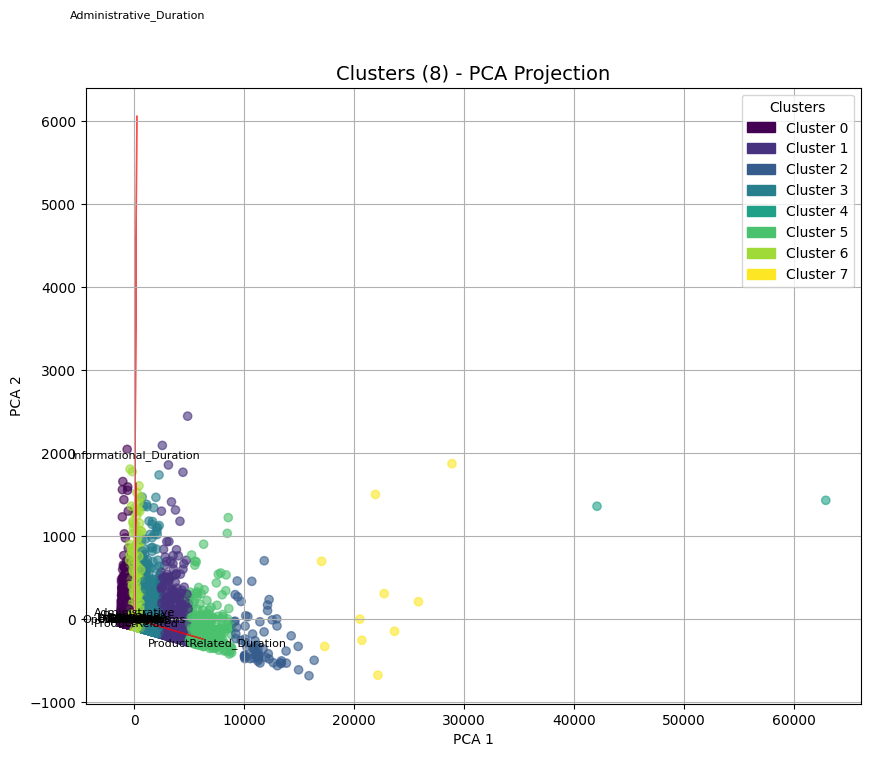

In [28]:
df_8, col_8 = kmeans(8)

A divisão entre 8 clusters torna a visualização dos dados mais limpa onde podemos reconhecer clusters, apenas com valores de outsiders e clusters com dados mais entrelaçados. Apesar de a diferença entre os tamsnhod degrupo analisados continuar crescendo (agora de 6633 para 2, equivalendo à uma variação de mais de 3000x) podemso enteder que os clusters com menores quantidades de dados analisados são os que parecem encglobar a maior parte de outsiders. Os estudos de variáveis continua semelhante aos apresentados anteriormente em que podemos perceber, entretanto podemos perceber que o cluster 4 é um grupo de "Falso puro" para a variável revenue, tornado-o um grupo de coportamento interessante uma vez que parece passar um longo tempo na página, sendo visitantes recorrentes mas mesmo assimnão fechando a compra.<br>
Cluster 0: Baixos Valores em Quase Todas Variáveis<br>
Cluster 1: Valores Intermediários de Revenue e Alto Valor de PageValues<br>
Cluster 2: Valores Intermediários e Maior Valor de Revenue <br>
Cluster 3: Valores Intermediários<br>
Cluster 4: Outliers extremos (Revenue Falso Puro)<br>
Cluster 5: Baixos Valores nas Páginas Informativas e Alto Valor de Revenue<br>
Cluster 6: Altos Valores de PageValues<br>
Cluster 7: Outliers intermediários com Alto Revenue

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [31]:
print("Para 2 clusters")
display(df_2.groupby(col_2)[['BounceRates', 'Revenue']].mean())
print("-"*200)
print("Para 3 clusters")
display(df_3.groupby(col_3)[['BounceRates', 'Revenue']].mean())
print("-"*200)
print("Para 8 clusters")
display(df_8.groupby(col_8)[['BounceRates', 'Revenue']].mean())

Para 2 clusters


BounceRates   Revenue
cluster_2                       
0             0.023359  0.142377
1             0.006488  0.302151

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Para 3 clusters


BounceRates   Revenue
cluster_3                       
0             0.025337  0.132002
1             0.005710  0.339806
2             0.007143  0.250127

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Para 8 clusters


BounceRates   Revenue
cluster_8                       
0             0.033317  0.095641
1             0.006768  0.291598
2             0.005211  0.375000
3             0.007506  0.224267
4             0.002808  0.000000
5             0.006208  0.330275
6             0.009184  0.204915
7             0.006777  0.300000

Com os dados analisados percebemos uma semlhança muito grande para os clusters com maior valor de Revenue, tanto nos valores da própria variável, aproximadamente, 0.33, quanto no baixo valor de BouceRates, 0.006, aproximado. Sendo esses Clusters o 1 para a primeira análise, o 1 para a segunda e 0 5 para a terceira. <br>
Devido a percepção visual e análise percebida dos dados médios analisados nos exercícios anteriores, eu dariapreferência para a escolha de análise com 8 clusters devido ao detalhe no qual poderiamos entrar com esse estudo. 